# Permutation effects

In [20]:
import scipy as sp
import numpy as np
from matplotlib import pyplot as plt

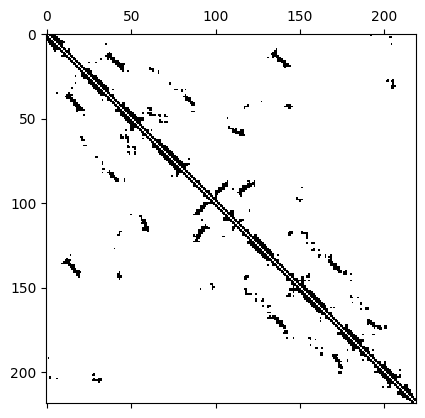

In [29]:
data = sp.io.loadmat('coord1PHP.mat')
A = data['A']
coord = data['coord']
Nnode = A.shape[0]
plt.spy(A)

In [22]:
Index = np.arange(Nnode)
PermIndex = np.random.permutation(Nnode)
PermMat = np.zeros((Nnode,Nnode))

In [23]:
for ind in Index:
    PermMat[Index[ind], PermIndex[ind]] = 1

A faster method could be

In [24]:
PermMat = sp.sparse.coo_matrix((np.ones(Nnode), (Index, PermIndex)), shape=(Nnode, Nnode)).toarray()

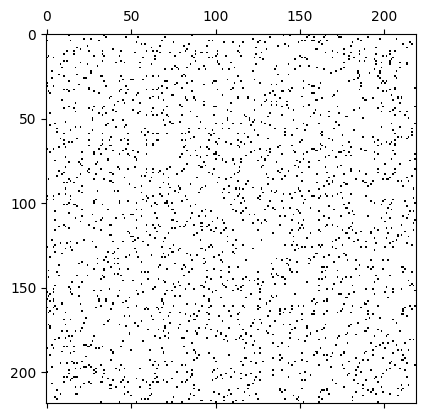

In [25]:
A2 = PermMat.dot(A).dot(PermMat.T)
plt.spy(A2)

We can invert the permutation effect

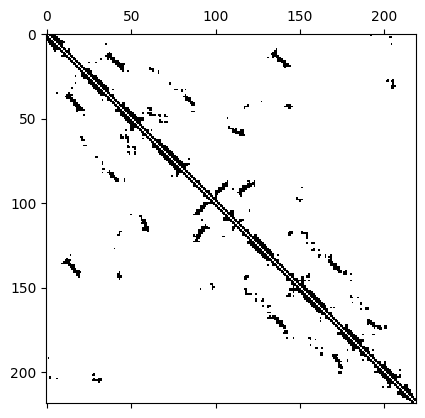

In [26]:
A3 = (PermMat.T).dot(A2).dot(PermMat)
plt.spy(A3)

Let's try to visualize the 3d structure of the protein

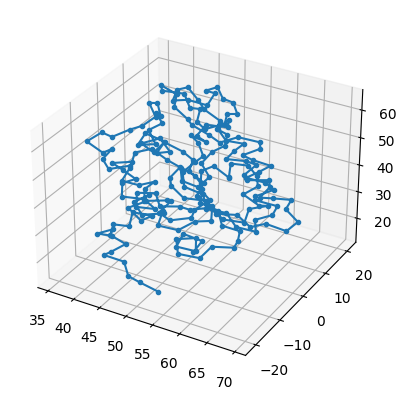

In [38]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

ax.plot(coord[:,0], coord[:,1], coord[:,2], marker='.')